In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Data
mall = pd.read_csv('Mall_Customers.csv')

In [3]:
# Descriptive Statistics About the Data
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Check if there is any Null data
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Check the first five rows of Data
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Number of Male to Female Customers')

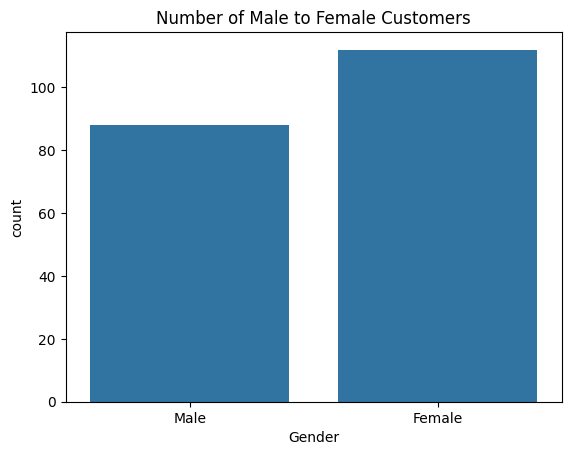

In [7]:
# Count plot for Male vs Female
sns.countplot(x='Gender', data=mall)
plt.title('Number of Male to Female Customers')

In [9]:
# Create a function that will categorize the customer into 3 categories: Young, Adult, or Senior
def age_category(x):
    if x <= 18:
        return 'Young'
    elif x<= 60:
        return 'Adult'
    else:
        return 'Senior'

In [10]:
# Applying map on the function
mall['age_category'] = mall.Age.map(age_category)

In [11]:
# Data of the Age Category
mall['age_category'].value_counts()

age_category
Adult     179
Senior     17
Young       4
Name: count, dtype: int64

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

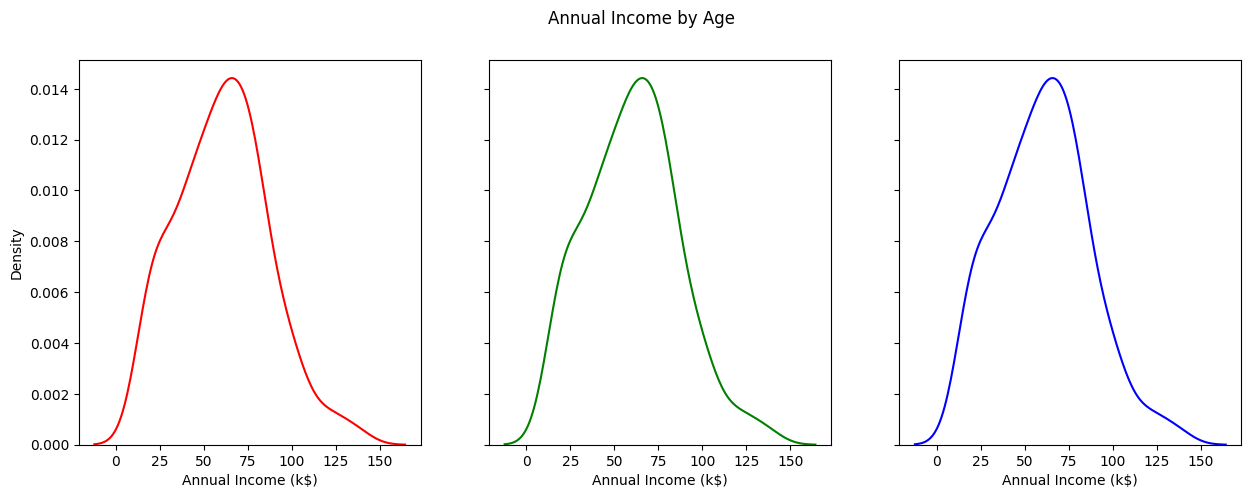

In [13]:
# Annual Income by Age Category
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Annual Income by Age')

sns.kdeplot(ax= axes[0], x=mall['Annual Income (k$)'],
            data=mall[mall['age_category']=='Young'], label='Young',color='red')

sns.kdeplot(ax= axes[1], x=mall['Annual Income (k$)'],
            data=mall[mall['age_category']=='Adult'], label='Adult',color='green')

sns.kdeplot(ax= axes[2], x=mall['Annual Income (k$)'],
            data=mall[mall['age_category']=='Senior'], label='Senior',color='blue')

In [14]:
## creating bins of age
mall['Age-Band']= pd.qcut(mall['Age'],6,labels=None)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '(17.999, 24.0]'),
  Text(1, 0, '(24.0, 31.0]'),
  Text(2, 0, '(31.0, 36.0]'),
  Text(3, 0, '(36.0, 45.0]'),
  Text(4, 0, '(45.0, 53.833]'),
  Text(5, 0, '(53.833, 70.0]')])

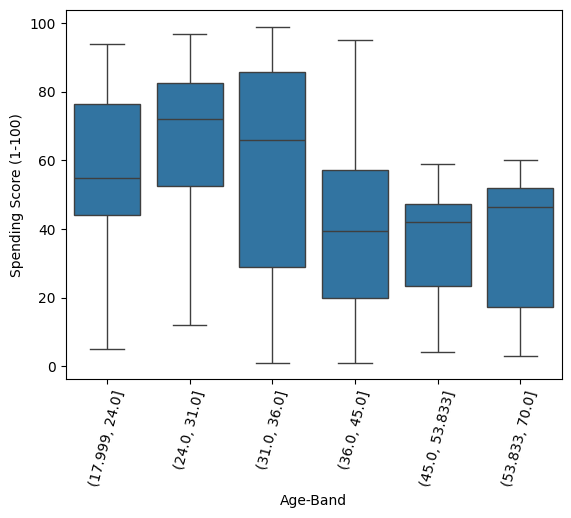

In [15]:
sns.boxplot(x= 'Age-Band',y='Spending Score (1-100)',data= mall)
plt.xticks(rotation=75)

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

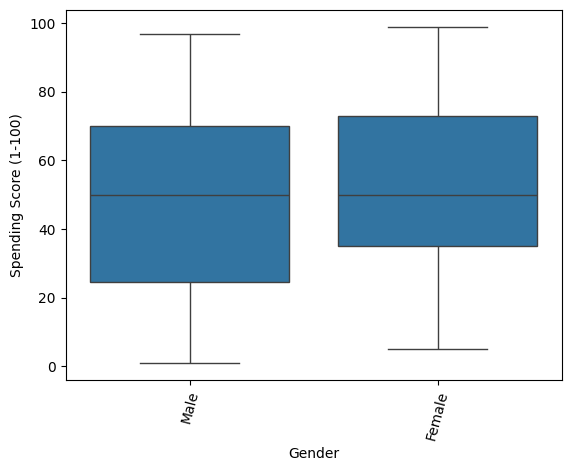

In [16]:
## boxplot of the spending score between male and female
sns.boxplot(x= 'Gender',y='Spending Score (1-100)',data= mall)
plt.xticks(rotation=75)

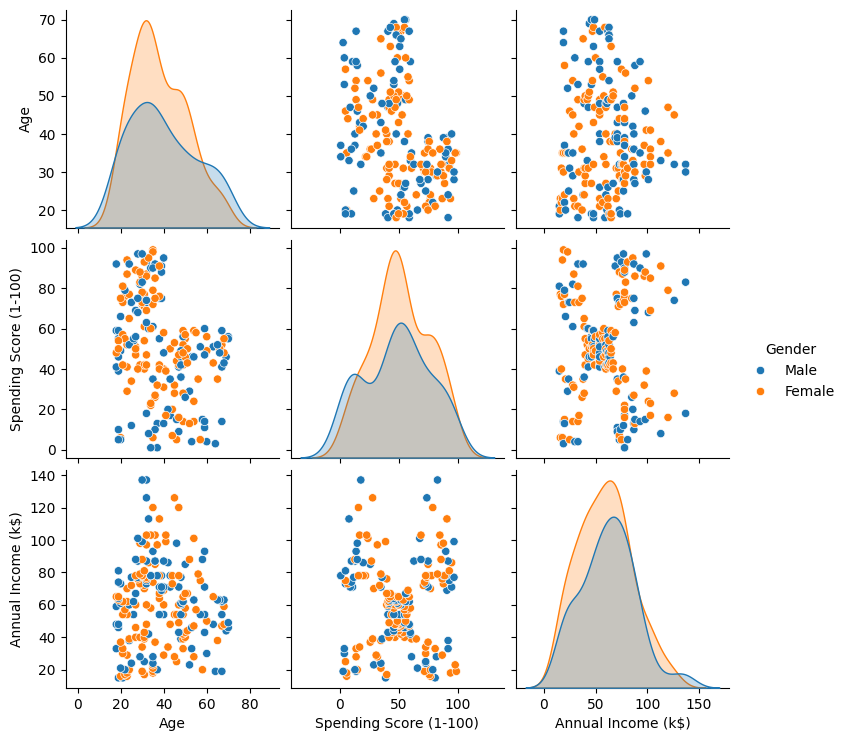

In [17]:
## between male and female
sns.pairplot(mall[['Age','Spending Score (1-100)','Annual Income (k$)','Gender']],hue='Gender')

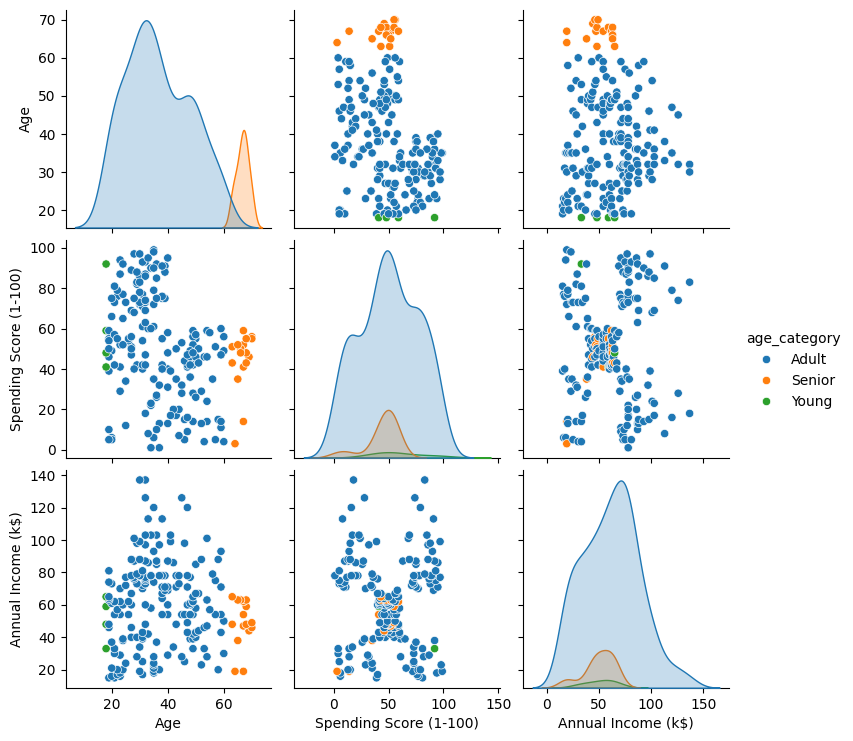

In [18]:
### a parplot with Age score
sns.pairplot(mall[['Age','Spending Score (1-100)','Annual Income (k$)','age_category']],hue='age_category')

Text(0.5, 1.0, 'Annual Income')

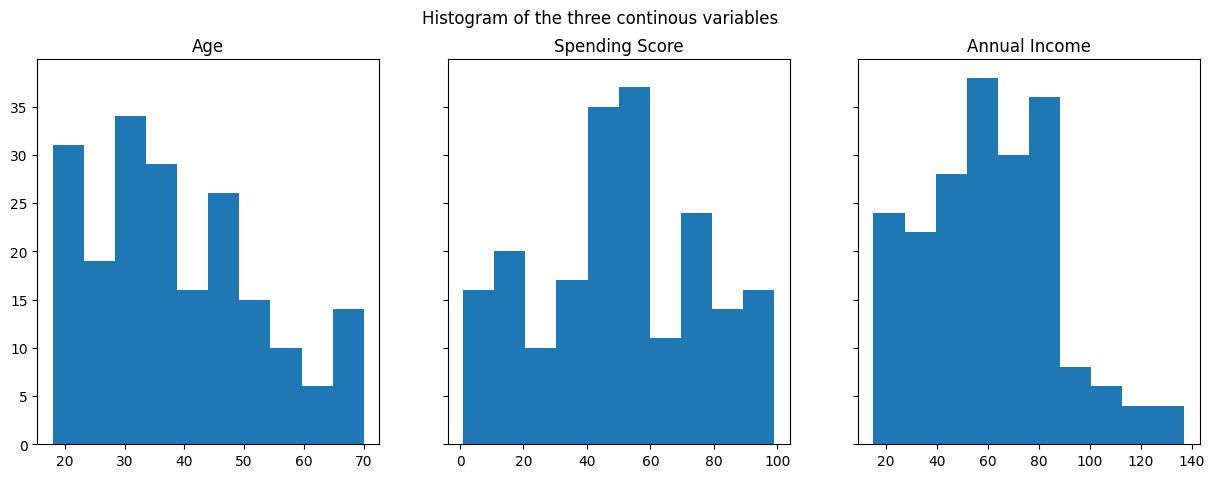

In [19]:
## a histogram of the three continous variables

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Histogram of the three continous variables')

axes[0].hist(x=mall.Age)
axes[0].set_title('Age')
axes[1].hist(x=mall['Spending Score (1-100)'])
axes[1].set_title('Spending Score')

axes[2].hist(x=mall['Annual Income (k$)'])
axes[2].set_title('Annual Income')



In [20]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_category,Age-Band
0,1,Male,19,15,39,Adult,"(17.999, 24.0]"
1,2,Male,21,15,81,Adult,"(17.999, 24.0]"
2,3,Female,20,16,6,Adult,"(17.999, 24.0]"
3,4,Female,23,16,77,Adult,"(17.999, 24.0]"
4,5,Female,31,17,40,Adult,"(24.0, 31.0]"


In [21]:
### Corelation between the three continous variables 
cor1=mall[['Age','Annual Income (k$)','Spending Score (1-100)']].corr()

<Axes: >

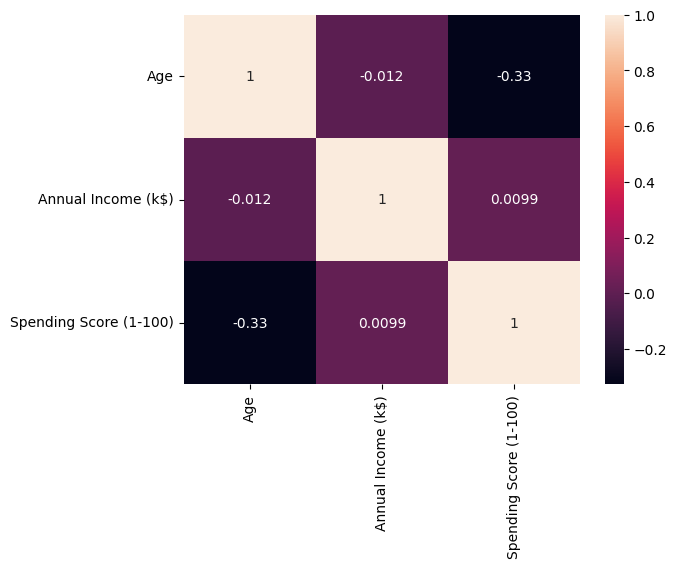

In [22]:
sns.heatmap(cor1,annot=True)

In [23]:
###scaling continous variables

segmentation_paremers= mall[['Age','Annual Income (k$)','Spending Score (1-100)']]
seg_scaled= (segmentation_paremers- segmentation_paremers.min())/(segmentation_paremers.max()- segmentation_paremers.min())


In [24]:
seg_scaled

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score


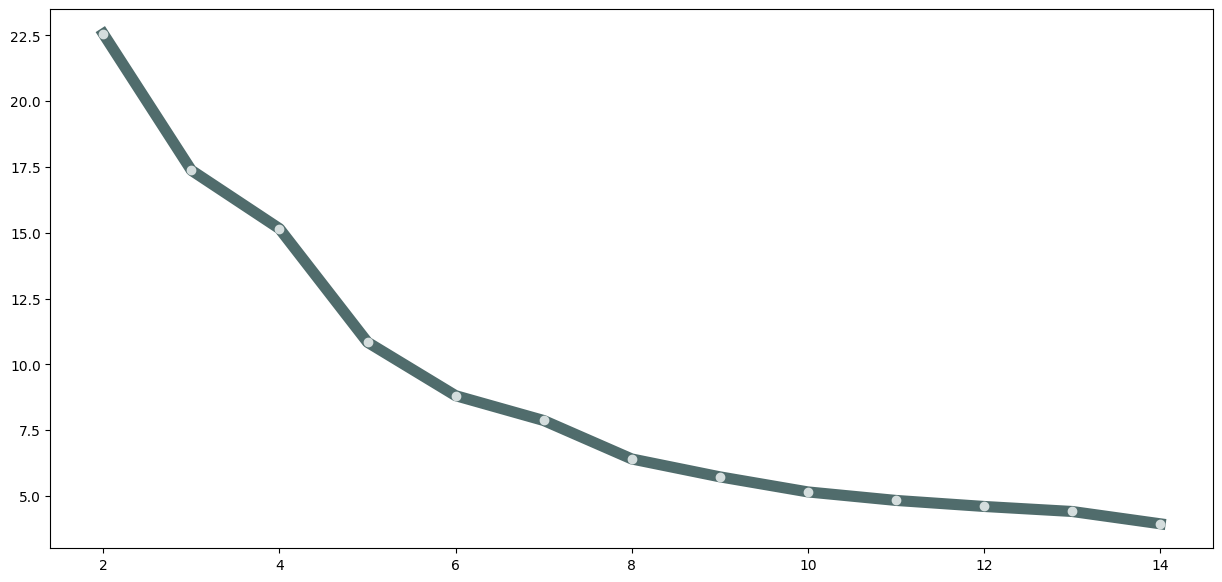

In [26]:
### a comparison between inertia and th number of clusters, the break of the arm or the elbow seems to be at 4 and 6
fig, ax = plt.subplots(figsize=(15,7))

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(seg_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(clusters_range,inertias, '-' , color='#244747',alpha = 0.8,linewidth=8)
plt.plot(clusters_range,inertias, 'o',linewidth=20,color='#d4dddd')    



In [27]:
##adopted from: Joshua swords 
###https://www.kaggle.com/joshuaswords/data-visualization-clustering-mall-data
#Making a senstivity analysis on the silhouette score
clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(seg_scaled)
        silhouette_avg = silhouette_score(seg_scaled,cluster_labels)
        #print("For N_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

In [28]:
results

[[2, 0, np.float64(0.3652498066402899)],
 [2, 1, np.float64(0.3652498066402899)],
 [2, 2, np.float64(0.3652498066402899)],
 [2, 3, np.float64(0.3652498066402899)],
 [2, 4, np.float64(0.3652498066402899)],
 [2, 5, np.float64(0.3652498066402899)],
 [2, 6, np.float64(0.3652498066402899)],
 [2, 7, np.float64(0.3652498066402899)],
 [2, 8, np.float64(0.3652498066402899)],
 [2, 9, np.float64(0.3652498066402899)],
 [2, 10, np.float64(0.3652498066402899)],
 [2, 11, np.float64(0.3652498066402899)],
 [2, 12, np.float64(0.3652498066402899)],
 [2, 13, np.float64(0.3652498066402899)],
 [2, 14, np.float64(0.3652498066402899)],
 [2, 15, np.float64(0.3652498066402899)],
 [2, 16, np.float64(0.3652498066402899)],
 [2, 17, np.float64(0.3652498066402899)],
 [2, 18, np.float64(0.3652498066402899)],
 [2, 19, np.float64(0.3652498066402899)],
 [3, 0, np.float64(0.36146237345652027)],
 [3, 1, np.float64(0.3129071233888862)],
 [3, 2, np.float64(0.36146237345652027)],
 [3, 3, np.float64(0.36412444589695475)],
 [3

In [29]:
# Turn results in to a pivot table

result = pd.DataFrame(results, columns=["Number of clusters","Random seed","Silhouette_score"])
pivot_km = pd.pivot_table(result, index="Number of clusters", columns="Random seed",values="Silhouette_score")

In [30]:
pivot_km

Random seed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Number of clusters,,,,,,,,,,,,,,,,,,,,
2,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250
3,0.361462,0.312907,0.361462,0.364124,0.364124,0.364124,0.365043,0.364124,0.364124,0.333345,0.364124,0.361462,0.364124,0.364124,0.364124,0.364124,0.364124,0.364124,0.364124,0.333345
4,0.294944,0.389723,0.389723,0.389723,0.389723,0.389723,0.392319,0.392319,0.392319,0.365864,0.389723,0.392319,0.392319,0.392319,0.389723,0.389723,0.389723,0.389723,0.392319,0.389723
5,0.363128,0.406117,0.363744,0.404210,0.406117,0.408320,0.406117,0.407991,0.373590,0.404210,0.406117,0.405881,0.405881,0.404210,0.405881,0.360531,0.408057,0.364030,0.405881,0.407346
6,0.386042,0.386042,0.380353,0.418788,0.419719,0.422588,0.391723,0.422129,0.379693,0.423486,0.386958,0.421554,0.355098,0.388396,0.422129,0.422101,0.421554,0.394416,0.423486,0.422129
7,0.381534,0.420512,0.392928,0.424932,0.420512,0.423889,0.385028,0.424932,0.406111,0.423215,0.424932,0.415190,0.337550,0.406686,0.418809,0.348038,0.418289,0.416690,0.414781,0.418489
8,0.415938,0.347940,0.428281,0.407898,0.374297,0.357469,0.323502,0.388474,0.415935,0.432565,0.389668,0.377559,0.404629,0.370250,0.414915,0.403360,0.417547,0.356375,0.415935,0.409601
9,0.428192,0.387702,0.428222,0.381167,0.385681,0.359210,0.352623,0.409878,0.412856,0.425584,0.385832,0.386922,0.371398,0.353793,0.399497,0.370744,0.419626,0.392264,0.383306,0.399026
10,0.425098,0.395334,0.398733,0.367630,0.399464,0.371946,0.369663,0.406180,0.400631,0.374157,0.399021,0.347836,0.389400,0.368650,0.364451,0.362899,0.393911,0.372786,0.396033,0.411891


In [ ]:
### getting the mean of score per number of clusters, it seems that 6 and 7 has the highest avrage silhouette score,
#nine categories seems to much and thats why we will go with six.
pivot_km['mean']= pivot_km.mean(axis=1)
pivot_km

Random seed,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,mean
Number of clusters,,,,,,,,,,,,,,,,,,,,,
2,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,...,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250,0.365250
3,0.361462,0.312907,0.361462,0.364124,0.364124,0.364124,0.365043,0.364124,0.364124,0.333345,...,0.361462,0.364124,0.364124,0.364124,0.364124,0.364124,0.364124,0.364124,0.333345,0.358132
4,0.294944,0.389723,0.389723,0.389723,0.389723,0.389723,0.392319,0.392319,0.392319,0.365864,...,0.392319,0.392319,0.392319,0.389723,0.389723,0.389723,0.389723,0.392319,0.389723,0.384700
5,0.363128,0.406117,0.363744,0.404210,0.406117,0.408320,0.406117,0.407991,0.373590,0.404210,...,0.405881,0.405881,0.404210,0.405881,0.360531,0.408057,0.364030,0.405881,0.407346,0.395868
6,0.386042,0.386042,0.380353,0.418788,0.419719,0.422588,0.391723,0.422129,0.379693,0.423486,...,0.421554,0.355098,0.388396,0.422129,0.422101,0.421554,0.394416,0.423486,0.422129,0.404419
7,0.381534,0.420512,0.392928,0.424932,0.420512,0.423889,0.385028,0.424932,0.406111,0.423215,...,0.415190,0.337550,0.406686,0.418809,0.348038,0.418289,0.416690,0.414781,0.418489,0.406152
8,0.415938,0.347940,0.428281,0.407898,0.374297,0.357469,0.323502,0.388474,0.415935,0.432565,...,0.377559,0.404629,0.370250,0.414915,0.403360,0.417547,0.356375,0.415935,0.409601,0.392607
9,0.428192,0.387702,0.428222,0.381167,0.385681,0.359210,0.352623,0.409878,0.412856,0.425584,...,0.386922,0.371398,0.353793,0.399497,0.370744,0.419626,0.392264,0.383306,0.399026,0.391676
10,0.425098,0.395334,0.398733,0.367630,0.399464,0.371946,0.369663,0.406180,0.400631,0.374157,...,0.347836,0.389400,0.368650,0.364451,0.362899,0.393911,0.372786,0.396033,0.411891,0.385786


In [32]:
### assigning the clusters to mall data
kmeans_sel = KMeans(n_clusters=6, random_state=1).fit(seg_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = mall.assign(Cluster=labels)

In [33]:
clustered_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),age_category,Age-Band,Cluster
0,1,Male,19,15,39,Adult,"(17.999, 24.0]",1
1,2,Male,21,15,81,Adult,"(17.999, 24.0]",2
2,3,Female,20,16,6,Adult,"(17.999, 24.0]",1
3,4,Female,23,16,77,Adult,"(17.999, 24.0]",2
4,5,Female,31,17,40,Adult,"(24.0, 31.0]",1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,Adult,"(31.0, 36.0]",3
196,197,Female,45,126,28,Adult,"(36.0, 45.0]",5
197,198,Male,32,126,74,Adult,"(31.0, 36.0]",3
198,199,Male,32,137,18,Adult,"(31.0, 36.0]",5


In [34]:
### grouping the clusters by age , income and spend
clustered_data.groupby('Cluster').agg(mean_age= ('Age','mean'),
                               mean_income= ('Annual Income (k$)','mean'),
                               mean_spending=('Spending Score (1-100)','mean'),
                                     count= ('Cluster','size')).reset_index()

,Cluster,mean_age,mean_income,mean_spending,count
0,0,45.454545,47.272727,38.454545,44
1,1,24.472222,52.972222,46.638889,36
2,2,25.272727,25.727273,79.363636,22
3,3,32.692308,86.538462,82.128205,39
4,4,62.896552,50.620690,42.827586,29
5,5,41.133333,90.533333,15.933333,30
